<>:45: SyntaxWarning: invalid escape sequence '\L'
<>:45: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Ali\AppData\Local\Temp\ipykernel_12276\3721733829.py:45: SyntaxWarning: invalid escape sequence '\L'
  root_folder = 'D:\Level 4\Pattern\Ass\Ass2\image'


Error: Unable to load the image.
D:\Level 4\Pattern\Ass\Ass2\image\foliage\Thumbs.db
Loading training images...
Loading training images...
Training the classifier...


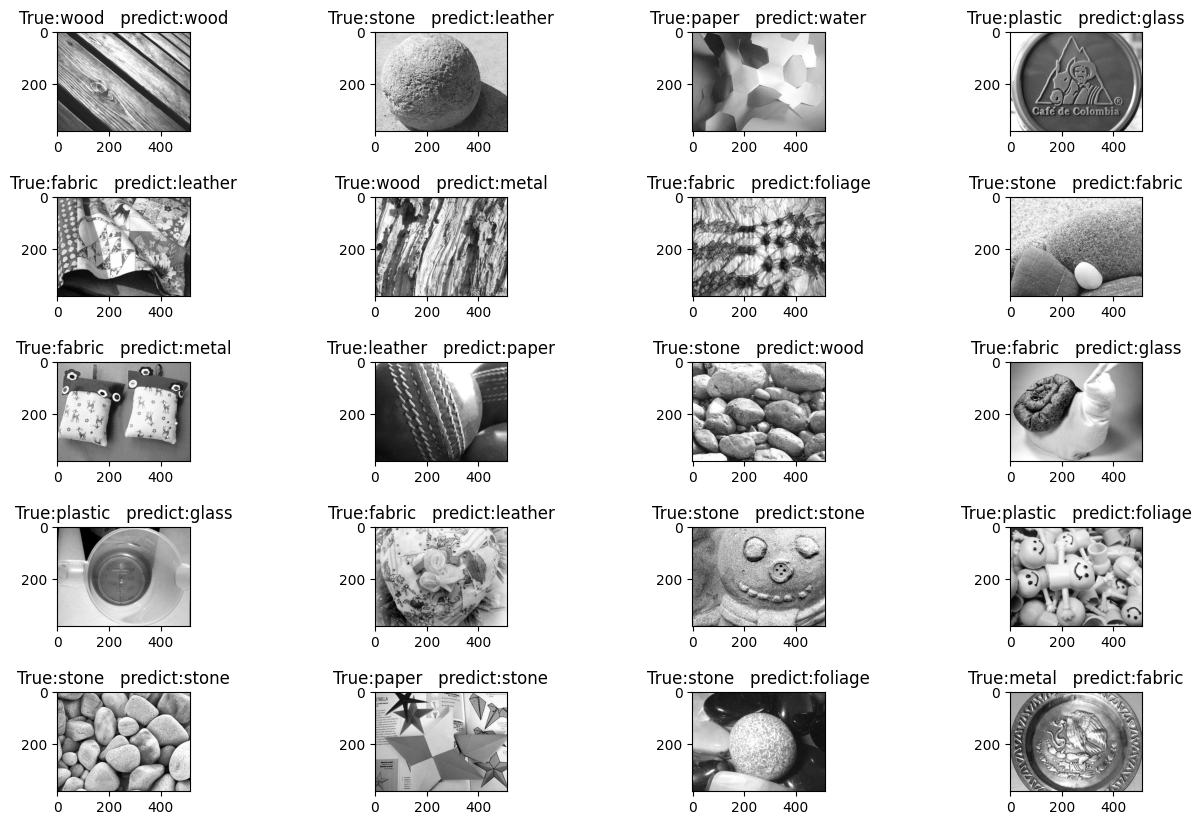

Accuracy: 15.0 % 



In [11]:
import os
import cv2
import numpy as np
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from  math import sqrt, pow

def load_images_from_folder(root_folder):
    data = []
    labels = []

    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)

        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                # img: <class 'numpy.ndarray'>
                if img is None:
                    print("Error: Unable to load the image.")
                    print(img_path)
                else:
                    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                if img is not None:
                    data.append(img)
                    labels.append(label)

    # shuffle data
    # Combine images and labels into a list of tuples
    dataset = list(zip(data, labels))
    # Shuffle the dataset
    random.shuffle(dataset)
    # Unpack the shuffled dataset back into separate lists
    data, labels = zip(*dataset)

    return np.array(data), np.array(labels)
    # data is list of images

# Set the path to your dataset folder
root_folder = 'D:\Level 4\Pattern\Ass\Ass2\image'

# Load images and labels and suffle them
images, labels = load_images_from_folder(root_folder)

# Function to extract GLCM features
def extract_texture_features(image):
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = image
    # Compute the GLCM matrix
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=np.max(image)+1, symmetric=False, normed=True)
    # angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]
    # Calculate the GLCM features
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    ASM = graycoprops(glcm, 'ASM')
    features = np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
    return features.flatten()


# Load training images and extract features
print('Loading training images...')
# Load training images and extract features
print('Loading training images...')
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
train_features = np.array([extract_texture_features(img) for img in train_images])
test_features = np.array([extract_texture_features(img) for img in test_images])
# Train the KNN classifier

print('Training the classifier...')
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_features, train_labels)

# Predict the class labels for testing images
predicted_labels = knn.predict(test_features)


accuracy = 0
# Print the predicted class labels and corresponding image names
plt.figure(figsize=(14 , 10))
for i in range(20):
  plt.subplot(5, 4 , 1 + i)
  plt.imshow(test_images[i], cmap=plt.get_cmap('gray'))
  plt.title("True:" +  str(test_labels[i]) + "   predict:" + str(predicted_labels[i]))
  if(str(test_labels[i]) == str(predicted_labels[i])):
      accuracy+=1
plt.subplots_adjust(hspace=0.5, wspace=1.4)
plt.show()
accuracy = (accuracy/20)*100
print('Accuracy:',accuracy ,'%' , '\n')




Distances (distances=[1]):

distances: It is a list of pixel pair distances over which the co-occurrence of pixel values is measured. In this case, it is set to [1], meaning the function will calculate the co-occurrence of pixel values for neighboring pixels separated by a distance of 1.
Angles (angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):

angles: This is a list of angles, in radians, specifying the directions for which the co-occurrence matrix will be calculated. The angles [0, np.pi/4, np.pi/2, 3*np.pi/4] correspond to four directions: 0 degrees (horizontal), 45 degrees, 90 degrees (vertical), and 135 degrees.
Levels (levels=256):

levels: This parameter specifies the number of gray levels in the image. In most cases, this is set to 256 for 8-bit images, where each pixel can take values from 0 to 255.
Symmetric (symmetric=True):

symmetric: If True, the GLCM will be symmetric. This means that the order of pixel pairs (i, j) is not considered different from (j, i). This is typically set to True to ensure symmetry.
Normalized (normed=True):

normed: If True, the resulting GLCM will be normalized to have values between 0 and 1. Normalization is useful when comparing GLCMs calculated from images with different sizes or intensity ranges.

<>:46: SyntaxWarning: invalid escape sequence '\L'
<>:46: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Ali\AppData\Local\Temp\ipykernel_12276\1819081794.py:46: SyntaxWarning: invalid escape sequence '\L'
  root_folder = 'D:\Level 4\Pattern\Ass\Ass2\image'


Loading training images...
Loading training images...
Training the classifier...


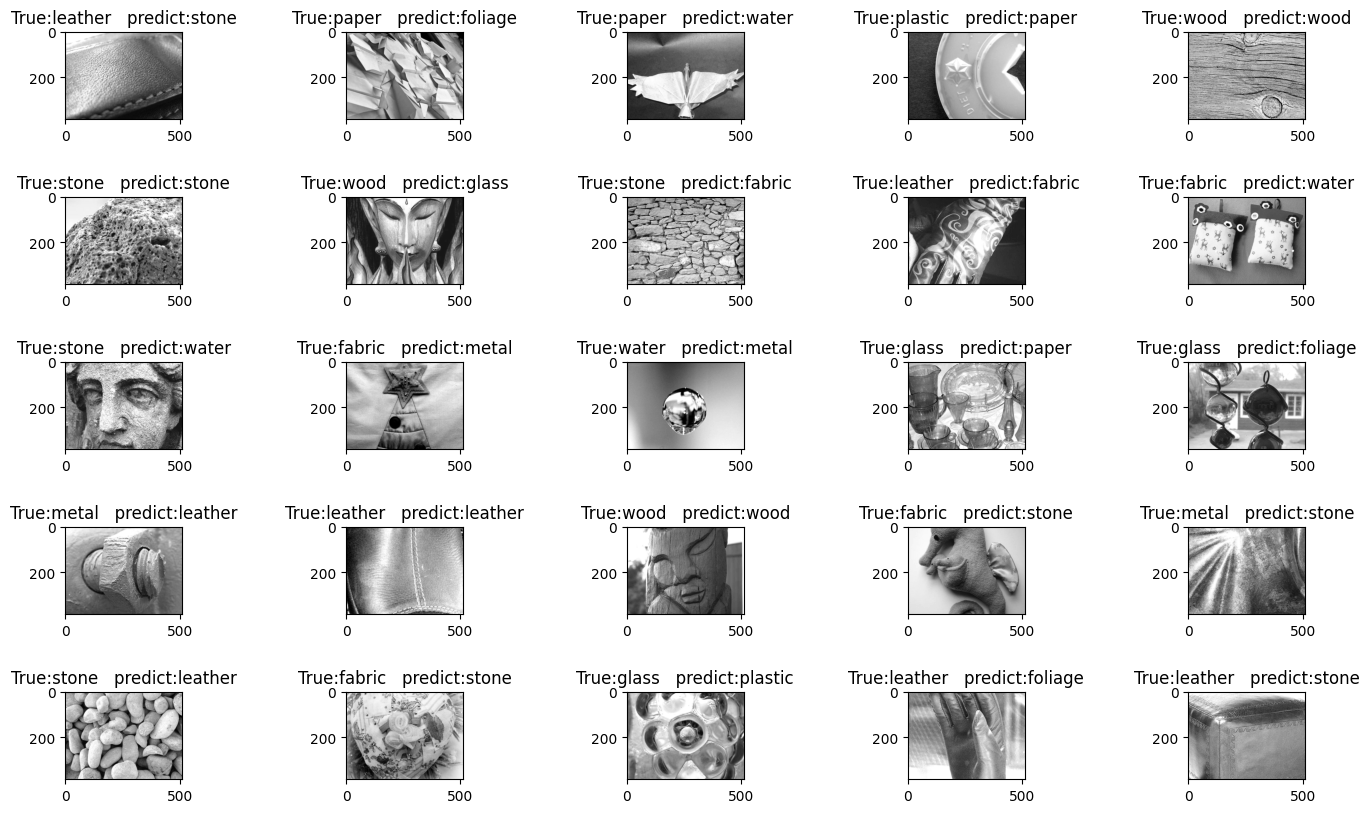

Accuracy: 16.0 % 



In [10]:
import os
import cv2
import numpy as np
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def load_images_from_folder(root_folder):
    data = []
    labels = []

    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)

        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                # img: <class 'numpy.ndarray'>
                # if img is None:
                #     print("Error: Unable to load the image.")
                #     print(img_path)
                if img is not None:
                    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                if img is not None:
                    data.append(img)
                    labels.append(label)

    # shuffle data
    # Combine images and labels into a list of tuples
    dataset = list(zip(data, labels))
    # Shuffle the dataset
    random.shuffle(dataset)
    # Unpack the shuffled dataset back into separate lists
    data, labels = zip(*dataset)

    return np.array(data), np.array(labels)
    # data is list of images

# Set the path to your dataset folder
root_folder = 'D:\Level 4\Pattern\Ass\Ass2\image'

# Load images and labels and suffle them
images, labels = load_images_from_folder(root_folder)

# Function to extract GLCM features
def extract_texture_features(image): # image is in gray level
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = image
    cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
    # Compute the GLCM matrix
    #glcm = graycomatrix(gray, distances=[1], angles=[0], levels=np.max(image)+1, symmetric=False, normed=True)
    glcm = graycomatrix(gray, distances=[1, 2, 3, 4], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], levels=np.max(image)+1, symmetric=False, normed=True)

    # angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]
    # Calculate the GLCM features
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    ASM = graycoprops(glcm, 'ASM')
    features = np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
    return features.flatten()


# Load training images and extract features
print('Loading training images...')
# Load training images and extract features
print('Loading training images...')
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
train_features = np.array([extract_texture_features(img) for img in train_images])
test_features = np.array([extract_texture_features(img) for img in test_images])
# Train the KNN classifier

print('Training the classifier...')
# scaler = StandardScaler()
# train_features_scaled = scaler.fit_transform(train_features)
# test_features_scaled = scaler.transform(test_features)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_features, train_labels)

# Predict the class labels for testing images
predicted_labels = knn.predict(test_features)


accuracy = 0
# Print the predicted class labels and corresponding image names
plt.figure(figsize=(16 , 10))
tests = len(test_images)//100 # 30 image
tests = 25
for i in range(tests):
  plt.subplot(tests//5, 5 , 1 + i)
  plt.imshow(test_images[i], cmap=plt.get_cmap('gray'))
  plt.title("True:" +  str(test_labels[i]) + "   predict:" + str(predicted_labels[i]))
  if(str(test_labels[i]) == str(predicted_labels[i])):
      accuracy+=1
plt.subplots_adjust(hspace=0.5, wspace=1.4)
plt.show()
accuracy = (accuracy/25)*100
print('Accuracy:',accuracy ,'%' , '\n')
